In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

### Clasificación con árboles de decisión en scikit-learn

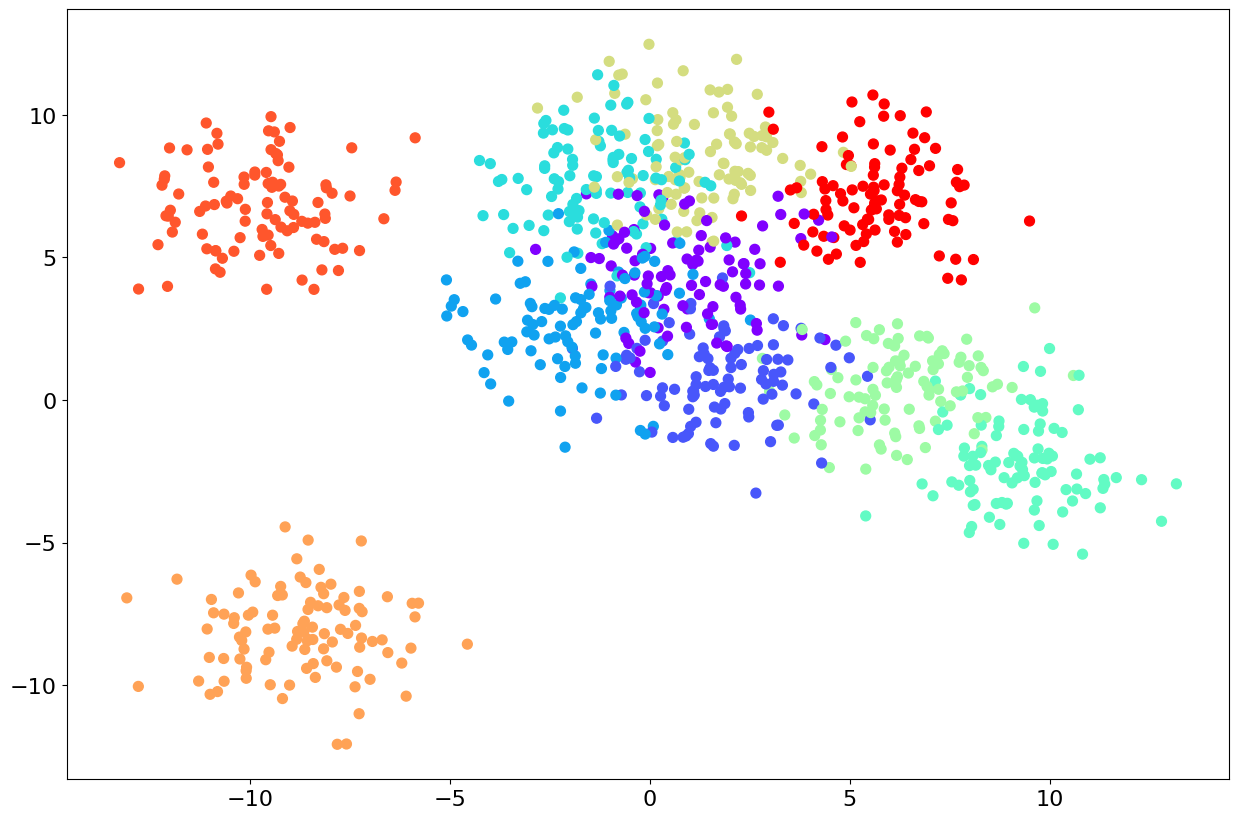

In [4]:
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples=1000, centers=10, random_state=0, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='rainbow');

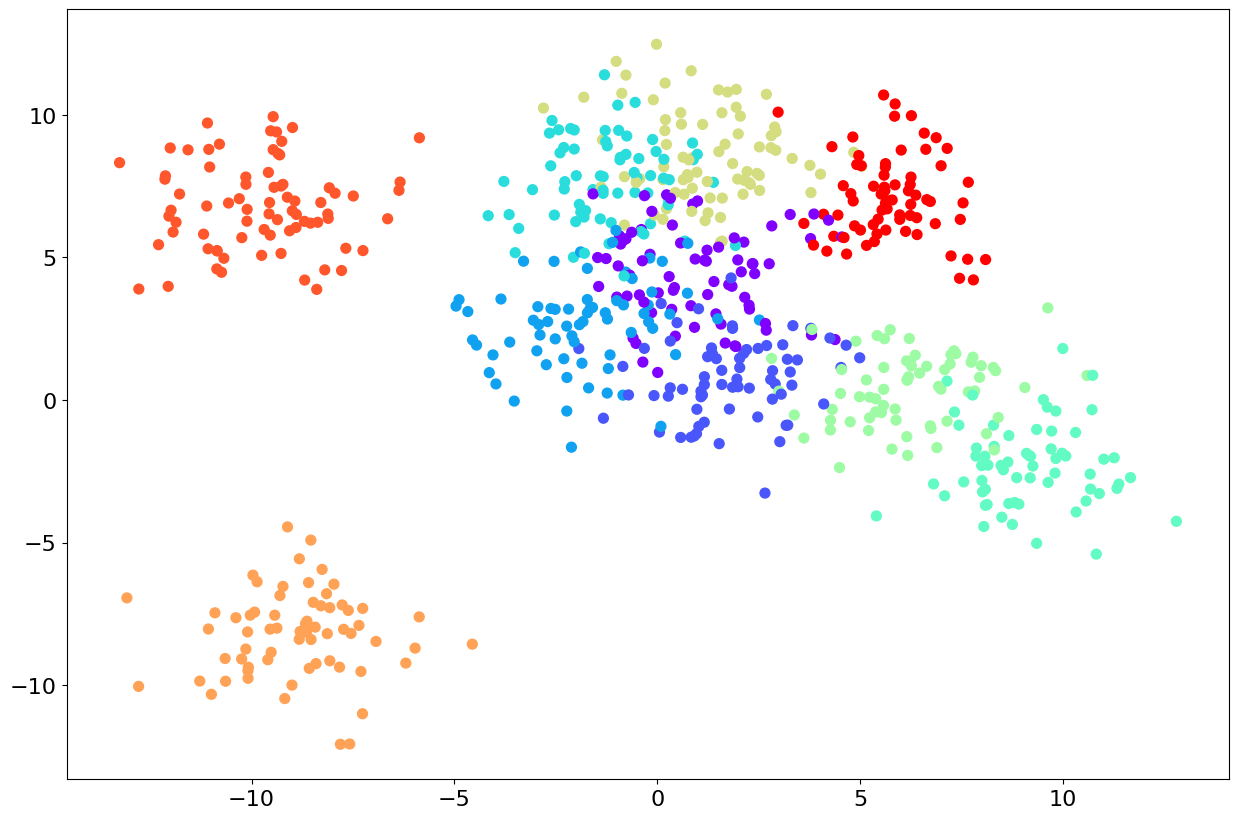

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=50, cmap='rainbow');

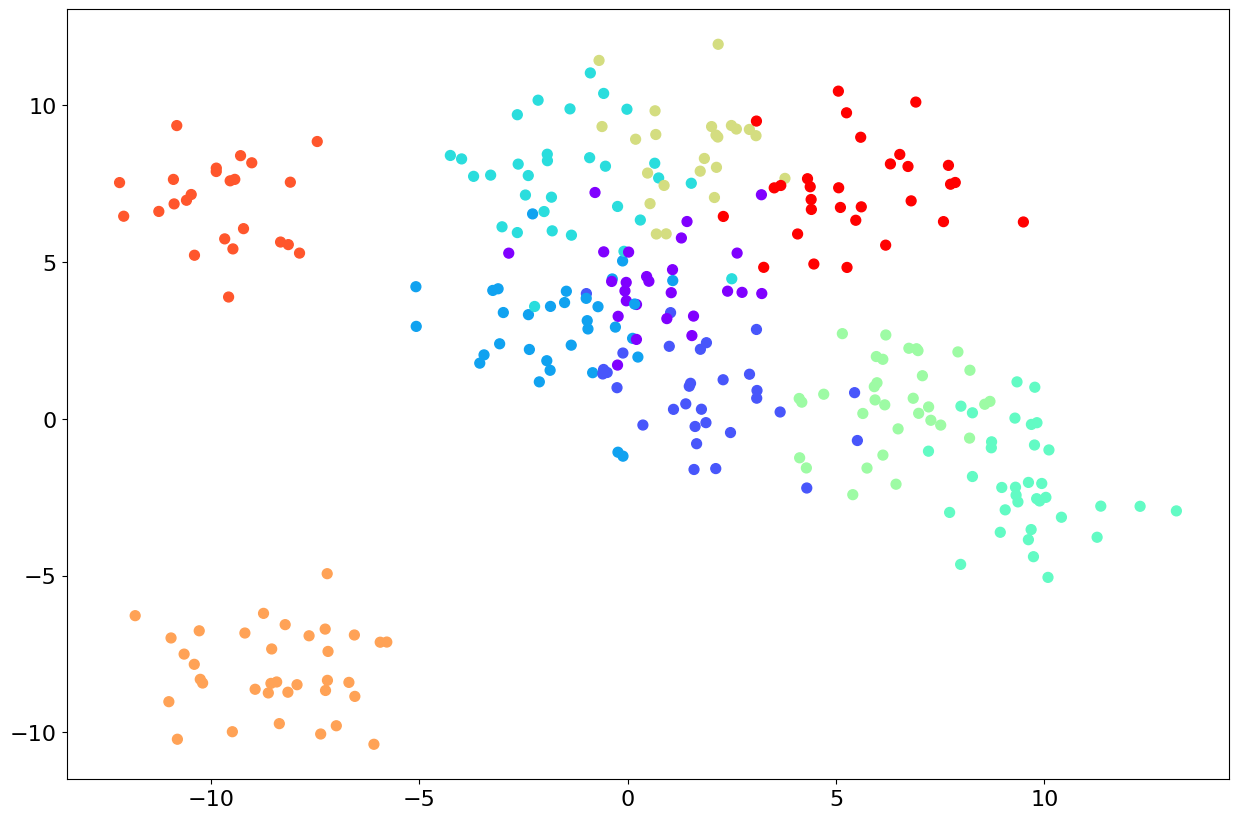

In [6]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, s=50, cmap='rainbow');

In [7]:
def visualize_classifier(model, X, Y, ax=None, cmap='rainbow'):

  ax = ax or plt.gca()
  ax.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=cmap, clim=(Y.min(), Y.max()), zorder=3)

  ax.axis('tight')
  ax.axis('off')
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()


  xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

  # Create a color plot with the results
  n_classes = len(np.unique(Y))
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, zorder=1)

  ax.set(xlim=xlim, ylim=ylim)

Confusion matrix:
 [[15  2  6  1  0  0  2  0  0  0]
 [ 7 20  0  1  0  3  0  0  0  0]
 [ 6  4 20  2  0  0  0  0  0  0]
 [ 2  0  1 20  0  0  8  0  0  0]
 [ 0  0  0  0 31  4  0  0  0  0]
 [ 0  2  0  0  2 29  0  0  0  0]
 [ 1  0  0  4  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  0  0  0  0  0  0  0 24  0]
 [ 2  0  0  0  0  0  5  0  0 23]]
Accuracy: 0.7833333333333333
Max depth: 17



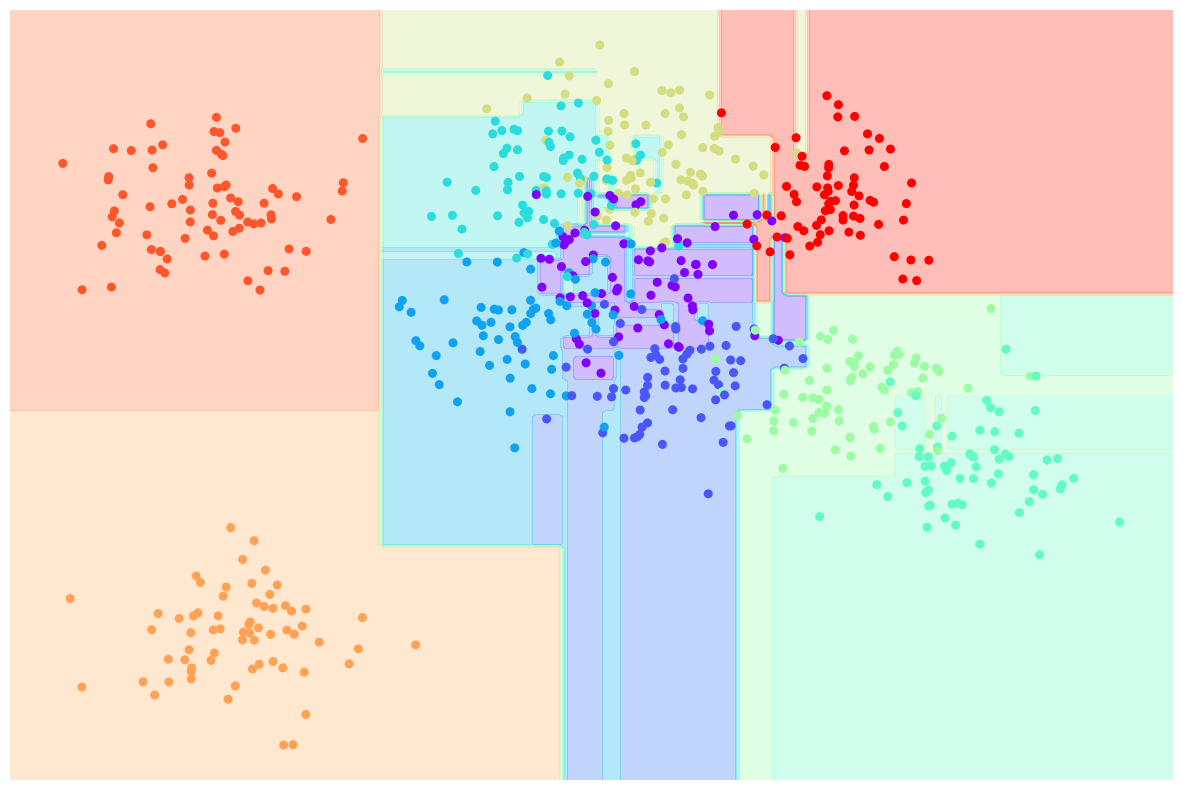

In [8]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 20)
tree.fit(X_train, Y_train)
predicted = tree.predict(X_test)
print(f'Confusion matrix:\n {metrics.confusion_matrix(Y_test, predicted)}')
print(f'Accuracy: {metrics.accuracy_score(Y_test, predicted)}')
print(f'Max depth: {tree.get_depth()}')
print()
visualize_classifier(tree, X_train, Y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
hyperparameters = [{'max_depth': [1,2,3,5,7,10,15,20], 'criterion': ['gini', 'entropy']}]
tree = GridSearchCV(DecisionTreeClassifier(), hyperparameters)
tree.fit(X_train, Y_train)
predicted = tree.predict(X_test)
print(f'Confusion matrix:\n {metrics.confusion_matrix(Y_test, predicted)}')
print(f'Accuracy: {metrics.accuracy_score(Y_test, predicted)}')
print(f'Max depth: {tree.best_estimator_.get_depth()}')
print()
visualize_classifier(tree, X_train, Y_train)

### Regresión con árboles en scikit-learn

In [ ]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [ ]:
# Fit regression model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor()
regr_3 = GridSearchCV(DecisionTreeRegressor(), [{'max_depth': [1,2,3,5,7,10,15,20]}])

regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y);

In [ ]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

In [ ]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label=f'auto_max_depth={regr_2.get_depth()}', linewidth=2)
plt.plot(X_test, y_3, color="red", label=f'optimal_max_depth={regr_3.best_estimator_.get_depth()}', linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()